# 窗口函数与卷积


In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

## 窗口函数

在信号处理中,窗函数(window function)是一种除在给定区间之外取值均为0的实函数.譬如:在给定区间内为常数而在区间外为0的窗函数被形象地称为矩形窗.任何函数与窗函数之积仍为窗函数,所以相乘的结果就像透过窗口"看"其他函数一样.窗函数在频谱分析,滤波器设计,波束形成,以及音频数据压缩(如在Ogg Vorbis音频格式中)等方面有广泛的应用.

numpy中提供了几种常见的窗函数

函数|说明
---|---
bartlett(M)	|Bartlett窗口函数
blackman(M)	|Blackman 窗口函数
hamming(M)	|Hamming窗口函数
hanning(M)	|Hanning窗口函数
kaiser(M, beta)	|Kaiser窗口函数

### bartlett窗

$$ w(n)=\frac{2}{N-1}\cdot\left(\frac{N-1}{2}-\left |n-\frac{N-1}{2}\right |\right)\, $$

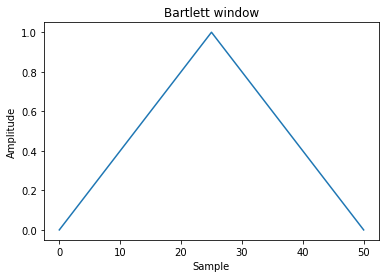

In [2]:
window = np.bartlett(51)
plt.plot(window)
plt.title("Bartlett window")
plt.ylabel("Amplitude")
plt.xlabel("Sample")
plt.show()

### Blackman窗

$$ 
w(n)=a_0 - a_1 \cos \left ( \frac{2 \pi n}{N-1} \right) + a_2 \cos \left ( \frac{4 \pi n}{N-1} \right)
$$
$$
{\displaystyle a_{0}=0.42;\quad a_{1}=0.5;\quad a_{2}=0.08\,} a_0=0.42;\quad a_1=0.5;\quad a_2=0.08\,
$$

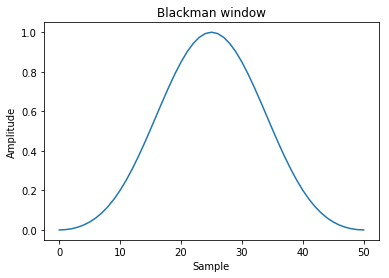

In [3]:
window = np.blackman(51)
plt.plot(window)
plt.title("Blackman window")
plt.ylabel("Amplitude")
plt.xlabel("Sample")
plt.show()

### Hamming窗

$$ w(n)=0.53836 - 0.46164\; \cos \left ( \frac{2 \pi n}{N-1} \right) $$

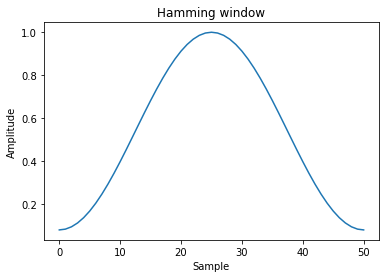

In [4]:
window = np.hamming(51)
plt.plot(window)
plt.title("Hamming window")
plt.ylabel("Amplitude")
plt.xlabel("Sample")
plt.show()

### Hanning窗

$$ w(n)= 0.5\; \left(1 - \cos \left ( \frac{2 \pi n}{N-1} \right) \right) $$

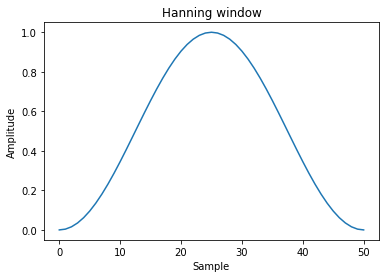

In [5]:
window = np.hanning(51)
plt.plot(window)
plt.title("Hanning window")
plt.ylabel("Amplitude")
plt.xlabel("Sample")
plt.show()

### Kaiser窗

$$ w(n)=\frac{I_0\Bigg (\pi\alpha \sqrt{1 - (\begin{matrix} \frac{2 n}{N-1} \end{matrix}-1)^2}\Bigg )} {I_0(\pi\alpha)} $$

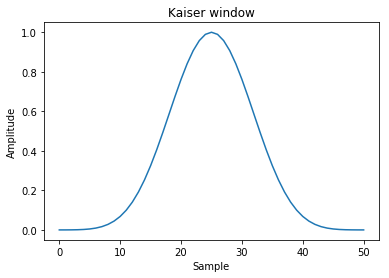

In [6]:
window = np.kaiser(51, 14)
plt.plot(window)
plt.title("Kaiser window")
plt.ylabel("Amplitude")
plt.xlabel("Sample")
plt.show()

## 卷积

卷积运算符经常出现在信号处理中,其中它模拟线性时不变系统对信号的影响.在概率理论中,两个独立随机变量的和根据它们各自的分布的卷积来分布.
**离散**卷积运算定义为:

$$ (a * v)[n] = \sum_{m = -\infty}^{\infty} a[m] v[n - m] $$

numpy提供了通用的卷积操作`convolve(a, v, mode='full')`


其中前两个参数都是一维的输入向量,而mode则提供了可选的三种运算规则,它可以有3种选项

+ full
    默认情况下,模式为"full".这在每个重叠点处返回卷积,其输出形状为(N M-1,).在卷积的端点,信号不完全重叠,并且可以看到边界效应.
    
+ same
    模式same返回长度max(M,N)的输出.边界效应仍然可见.
    
+ valid
    模式'valid'返回长度为max(M,N)-min(M,N)+1.卷积产物仅针对信号完全重叠的点给出.信号边界外的值没有效果.

In [7]:
np.convolve([1, 2, 3], [0, 1, 0.5])

# a相当于[...0,0,1,2, 3 ,0,0,...]
# v相当于[...0,0,0,1,0.5,0,0,...]
# [0*0.5+0*1+1*0+2*0+3*0,
# 0*0.5+1*1+2*0+3*0,
# 1*0.5+2*1+3*0,
# 1*0+2*0.5+3*1+0*0,
# 1*0+2*0+3*0.5+0*1+0*0]

array([0. , 1. , 2.5, 4. , 1.5])

In [8]:
np.convolve([1,2,3],[0,1,0.5], 'same')

array([1. , 2.5, 4. ])

In [9]:
np.convolve([1,2,3],[0,1,0.5], 'valid')

array([2.5])